In [1]:
import imagehash as ih
from PIL import Image as Im
import numpy as np
import math as ma
import pandas as pd
from scipy import misc,ndimage
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
%cd C:/Users/Dustin/Dropbox/My Dropbox/Deep Learning/Project

C:\Users\Dustin\Dropbox\My Dropbox\Deep Learning\Project


In [2]:
def line( x0, y0, x1, y1):
    x = np.arange( x0, x1+1 , 1)
    m = (y1 - y0)/(x1 - x0)
    y = ( m*( x - x0) + y0 ).astype('int')
    return x,y

def addline( R, G, B):
    thick = int(np.random.uniform( 1, R.shape[1]/100) )
    dark = int(np.random.uniform( 1, 100 ))
    x0 = int(np.random.uniform( 0, R.shape[0]-1 ))
    y0 = int(np.random.uniform( 0, R.shape[1] ))
    x1 = int(np.random.uniform( x0+1, R.shape[0] ))
    y1 = int(np.random.uniform( 0, R.shape[1] ))
    x = np.array([])
    y = np.array([])
    for i in range(thick):
        xn,yn = line( x0, (y0+i)%R.shape[1] ,x1, (y1 + i)%R.shape[1])
        x = np.append( x, xn ).astype('int')
        y = np.append( y, yn ).astype('int')
    R[x,y] = (R[x,y] - dark)%255
    G[x,y] = (G[x,y] - dark)%255
    B[x,y] = (B[x,y] - dark)%255
    return R,G,B

vint = np.vectorize(int)

In [ ]:
df = np.transpose(pd.DataFrame(np.zeros(128)))
name = np.array('test')

for i in range(264):
    for j in range(200):
        card = os.listdir('KaladeshRed')[i]
        imgR = misc.imread(('KaladeshRed/'+card))[:,:,0]
        imgG = misc.imread(('KaladeshGreen/'+card))[:,:,0]
        imgB = misc.imread(('KaladeshBlue/'+card))[:,:,0]
        im = np.array([imgR,imgG,imgB])
        im = np.transpose( im , (1,2,0) )
        
        for k in range( ma.floor(np.random.uniform(0,100))):
            R = im[:,:,0]
            G = im[:,:,1]
            B = im[:,:,2]
            R, G, B = addline(R,G,B)
            im = np.array([R,G,B])
            im = np.transpose( im , (1,2,0) )
        im = ndimage.filters.gaussian_filter( im, np.random.uniform(0,1.5))
        
        card_name = re.sub('\.full\.jpg',"", card)
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ,im[:,:,0])
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ,im[:,:,1])
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ,im[:,:,2])
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ,im)
        
        rd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ))
        gd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ))
        bd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ))
        fd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ))
        rp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ))
        gp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ))
        bp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ))
        fp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ))
        
        ird = vint(np.array(list(str(rd))).astype(str),16)
        irp = vint(np.array(list(str(rp))).astype(str),16)
        igd = vint(np.array(list(str(gd))).astype(str),16)
        igp = vint(np.array(list(str(gp))).astype(str),16)
        ibd = vint(np.array(list(str(bd))).astype(str),16)
        ibp = vint(np.array(list(str(bp))).astype(str),16)
        ifd = vint(np.array(list(str(fd))).astype(str),16)
        ifp = vint(np.array(list(str(fp))).astype(str),16)
        colu = pd.DataFrame(np.hstack([ird,irp, igd,igp, ibd,ibp, ifd,ifp]))
        
        df = df.append(np.transpose(colu), ignore_index = True)
        name = np.append(name, card_name )
        
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]))
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]))
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]))
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]))
    print(card_name)

In [4]:
df1 = df.drop(df.index[0])
name1 = np.delete( name, 0)

In [5]:
df1["label"] = name1
df1.shape

(52800, 129)

In [6]:
df1.to_csv('Training Data.csv')

In [ ]:
df = np.transpose(pd.DataFrame(np.zeros(128)))
name = np.array('test')

for i in range(264):
    for j in range(100):
        card = os.listdir('KaladeshRed')[i]
        imgR = misc.imread(('KaladeshRed/'+card))[:,:,0]
        imgG = misc.imread(('KaladeshGreen/'+card))[:,:,0]
        imgB = misc.imread(('KaladeshBlue/'+card))[:,:,0]
        im = np.array([imgR,imgG,imgB])
        im = np.transpose( im , (1,2,0) )
        
        for k in range( ma.floor(np.random.uniform(0,100))):
            R = im[:,:,0]
            G = im[:,:,1]
            B = im[:,:,2]
            R, G, B = addline(R,G,B)
            im = np.array([R,G,B])
            im = np.transpose( im , (1,2,0) )
        im = ndimage.filters.gaussian_filter( im, np.random.uniform(0,1.5))
        
        card_name = re.sub('\.full\.jpg',"", card)
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ,im[:,:,0])
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ,im[:,:,1])
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ,im[:,:,2])
        misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ,im)
        
        rd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ))
        gd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ))
        bd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ))
        fd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ))
        rp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ))
        gp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ))
        bp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ))
        fp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ))
        
        ird = vint(np.array(list(str(rd))).astype(str),16)
        irp = vint(np.array(list(str(rp))).astype(str),16)
        igd = vint(np.array(list(str(gd))).astype(str),16)
        igp = vint(np.array(list(str(gp))).astype(str),16)
        ibd = vint(np.array(list(str(bd))).astype(str),16)
        ibp = vint(np.array(list(str(bp))).astype(str),16)
        ifd = vint(np.array(list(str(fd))).astype(str),16)
        ifp = vint(np.array(list(str(fp))).astype(str),16)
        colu = pd.DataFrame(np.hstack([ird,irp, igd,igp, ibd,ibp, ifd,ifp]))
        
        df = df.append(np.transpose(colu), ignore_index = True)
        name = np.append(name, card_name )
        
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]))
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]))
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]))
        os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]))
        
    print(card_name)

In [8]:
df1 = df.drop(df.index[0])
name1 = np.delete( name, 0)
df1["label"] = name1
df1.shape

(26400, 129)

In [9]:
df1.to_csv('Testing Data.csv')

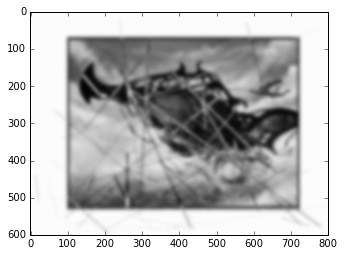

In [6]:
# Just one image
i = 6
card = os.listdir('KaladeshRed')[i]
imgR = misc.imread(('KaladeshRed/'+card))[:,:,0]
imgG = misc.imread(('KaladeshGreen/'+card))[:,:,0]
imgB = misc.imread(('KaladeshBlue/'+card))[:,:,0]
im = np.array([imgR,imgG,imgB])
im = np.transpose( im , (1,2,0) )
        
for k in range( ma.floor(np.random.uniform(0,100))):
    R = im[:,:,0]
    G = im[:,:,1]
    B = im[:,:,2]
    R, G, B = addline(R,G,B)
    im = np.array([R,G,B])
    im = np.transpose( im , (1,2,0) )
im = ndimage.filters.gaussian_filter( im, 5)

plt.imshow(im)

In [7]:
im = misc.imread('Card Dump/SmugglersCopter.png')

In [8]:
card_name = 'Looter Scooter'
misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ,im[:,:,0])
misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ,im[:,:,1])
misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ,im[:,:,2])
misc.imsave( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ,im)

rd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ))
gd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ))
bd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ))
fd = ih.dhash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ))
rp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]) ))
gp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]) ))
bp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]) ))
fp = ih.phash( Im.open( ''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]) ))

ird = vint(np.array(list(str(rd))).astype(str),16)
irp = vint(np.array(list(str(rp))).astype(str),16)
igd = vint(np.array(list(str(gd))).astype(str),16)
igp = vint(np.array(list(str(gp))).astype(str),16)
ibd = vint(np.array(list(str(bd))).astype(str),16)
ibp = vint(np.array(list(str(bp))).astype(str),16)
ifd = vint(np.array(list(str(fd))).astype(str),16)
ifp = vint(np.array(list(str(fp))).astype(str),16)
colu = pd.DataFrame(np.hstack([ird,irp, igd,igp, ibd,ibp, ifd,ifp]))

os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".R",".jpg"]))
os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".G",".jpg"]))
os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".B",".jpg"]))
os.remove(''.join(["C:/Users/Dustin/Desktop",card_name,".full",".jpg"]))

In [14]:
df = np.transpose(pd.DataFrame(np.zeros(128)))
name = np.array('test')

df = df.append(np.transpose(colu), ignore_index = True)
name = np.append(name, card_name )

df1 = df.drop(df.index[0])
name1 = np.delete( name, 0)

df1["label"] = name1
df1.shape

(1, 129)

In [15]:
df1.to_csv('Real Data.csv')